In [1]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from prometheus_api_client.utils import parse_datetime
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
prom = PrometheusConnect(url="http://127.0.0.1:9090", disable_ssl=True)

In [3]:
def visualize(name, query):

    start_time = parse_datetime("1h")
    end_time = parse_datetime("now")

    metric_data = prom.custom_query_range(
        query,  # this is the metric name and label config
        start_time=start_time,
        end_time=end_time,
        step="14",
    )

    metric_df = MetricRangeDataFrame(metric_data, columns=['timestamp', 'serviceName', 'value'])

    metric_df['value'] = metric_df['value'].apply(float)
    metric_df.reset_index(inplace=True)
    metric_df['timestamp'] = metric_df['timestamp'].apply(datetime.fromtimestamp)
    metric_df.set_index('timestamp', inplace=True)
    print(metric_df.head())
    group = metric_df.groupby(["serviceName"])
    plt.figure(figsize=(20, 6), dpi=80)
    legends = []
    for state, frame in group:
        plt.plot(frame.index.to_list(), frame['value'].to_list())
        legends.append(state)
    plt.legend(legends)
    plt.xlabel("Time")
    plt.ylabel(name)

                    serviceName      value
timestamp                                 
2022-02-19 19:43:33   service-1  26.932203
2022-02-19 19:43:47   service-1  26.593220
2022-02-19 19:44:01   service-1  26.593220
2022-02-19 19:44:15   service-1  26.423729
2022-02-19 19:44:29   service-1  24.915254


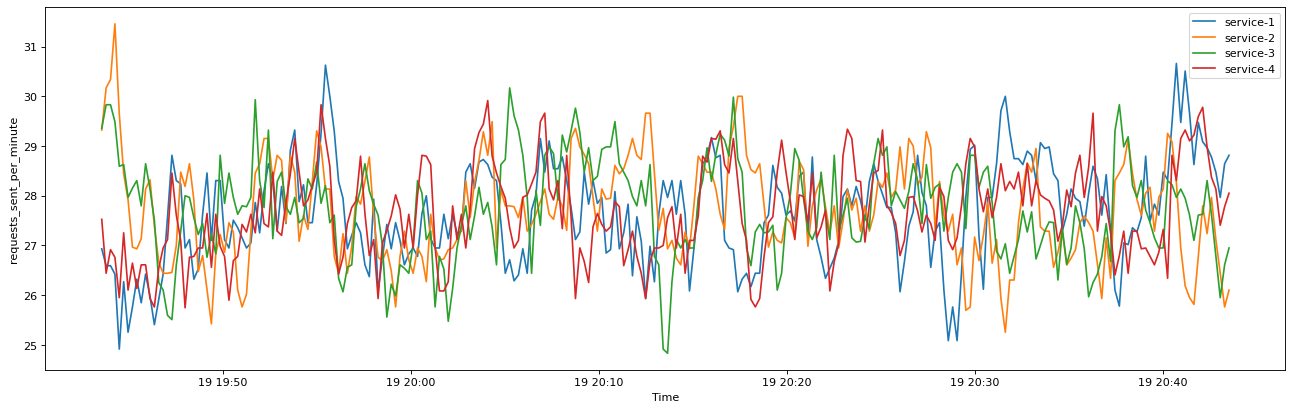

In [4]:
visualize('requests_sent_per_minute', 'rate(requests_sent_total[1m])')

                    serviceName      value
timestamp                                 
2022-02-19 19:43:33   service-1  18.338983
2022-02-19 19:43:47   service-1  19.491525
2022-02-19 19:44:01   service-1  19.152542
2022-02-19 19:44:15   service-1  18.983051
2022-02-19 19:44:29   service-1  17.796610


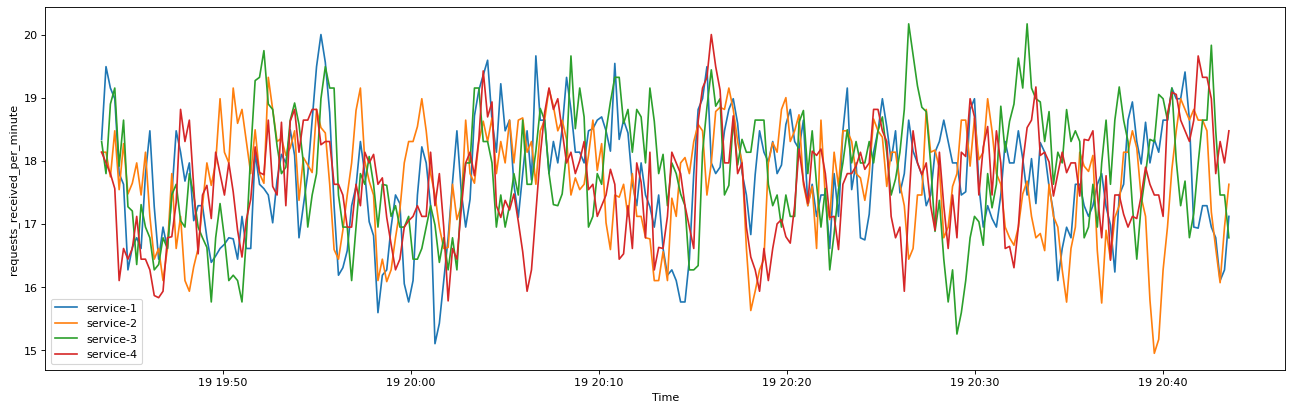

In [5]:
visualize('requests_received_per_minute', 'sum by (serviceName) (rate(requests_received_total[1m]))')

                    serviceName     value
timestamp                                
2022-02-19 19:43:34   service-1  0.074499
2022-02-19 19:43:48   service-1  0.071115
2022-02-19 19:44:02   service-1  0.070825
2022-02-19 19:44:16   service-1  0.073196
2022-02-19 19:44:30   service-1  0.068771


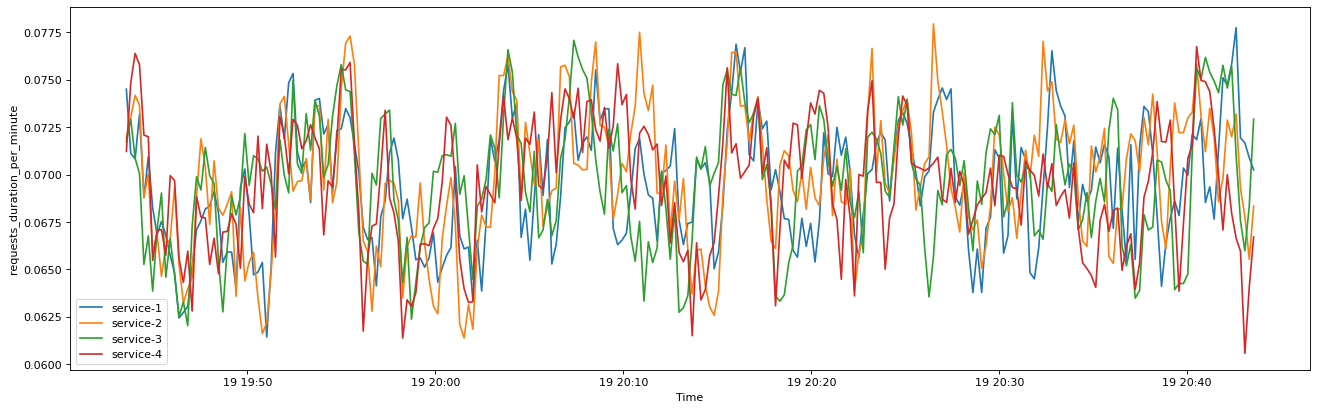

In [6]:
visualize('requests_duration_per_minute', 'rate(request_duration_seconds_sum[1m])')

                    serviceName        value
timestamp                                   
2022-02-19 19:43:34   service-1  307586440.0
2022-02-19 19:43:48   service-1  307586440.0
2022-02-19 19:44:02   service-1  307586440.0
2022-02-19 19:44:16   service-1  307586440.0
2022-02-19 19:44:30   service-1  307586440.0


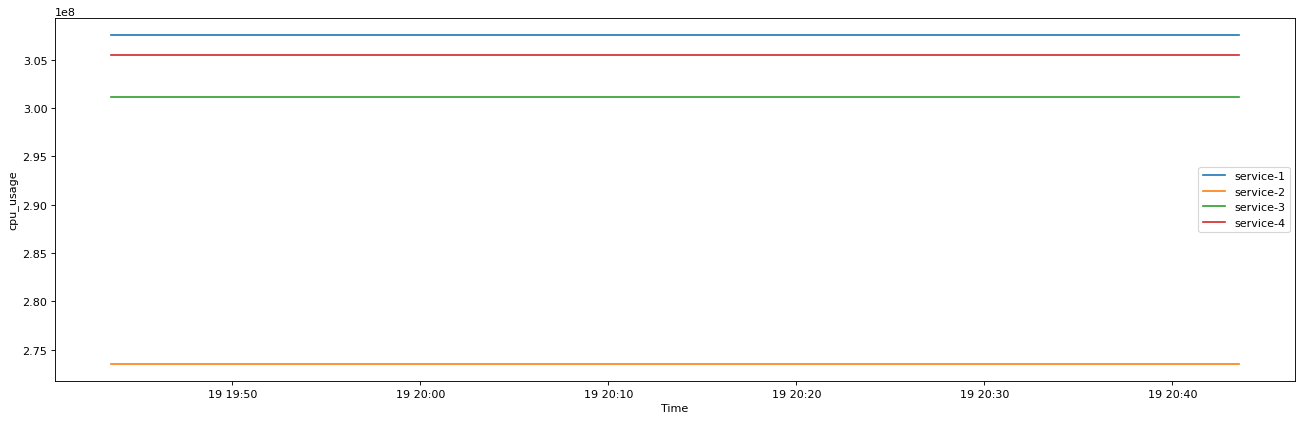

In [7]:
visualize('cpu_usage', 'avg_over_time(cpu_seconds[1m])')

                    serviceName       value
timestamp                                  
2022-02-19 19:43:34   service-1  98295808.0
2022-02-19 19:43:48   service-1  98295808.0
2022-02-19 19:44:02   service-1  98295808.0
2022-02-19 19:44:16   service-1  98295808.0
2022-02-19 19:44:30   service-1  98295808.0


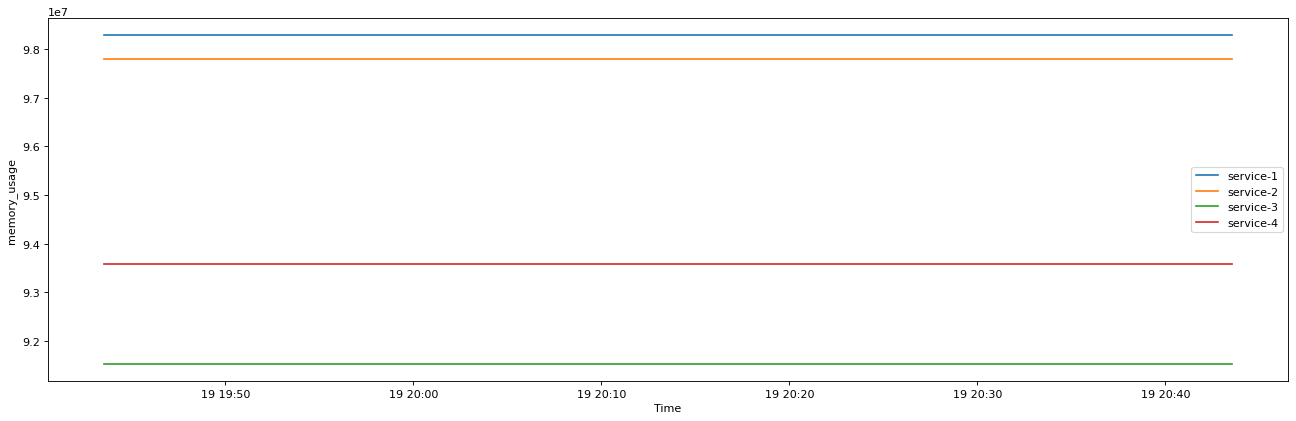

In [8]:
visualize('memory_usage', 'avg_over_time(memory_usage_bytes[1m])')

                    serviceName         value
timestamp                                    
2022-02-19 19:43:34   service-1  14086.457627
2022-02-19 19:43:48   service-1  13537.016949
2022-02-19 19:44:02   service-1  13478.711864
2022-02-19 19:44:16   service-1  13911.813559
2022-02-19 19:44:30   service-1  13172.949153


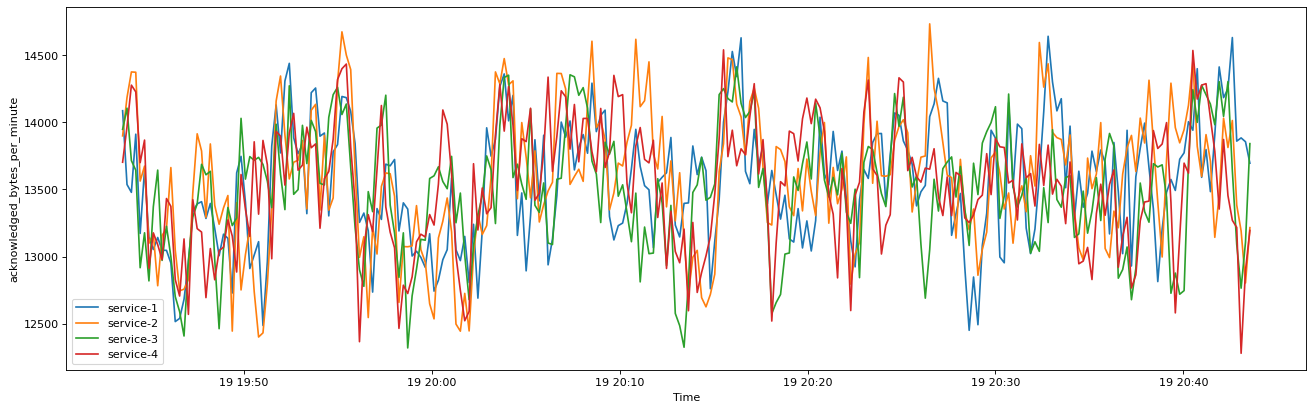

In [9]:
visualize('acknowledged_bytes_per_minute', 'rate(acknowledged_bytes_sum[1m])')

                    serviceName         value
timestamp                                    
2022-02-19 19:43:35   service-1  15869.491525
2022-02-19 19:43:49   service-1  15445.084746
2022-02-19 19:44:03   service-1  15344.406780
2022-02-19 19:44:17   service-1  15545.423729
2022-02-19 19:44:31   service-1  14812.372881


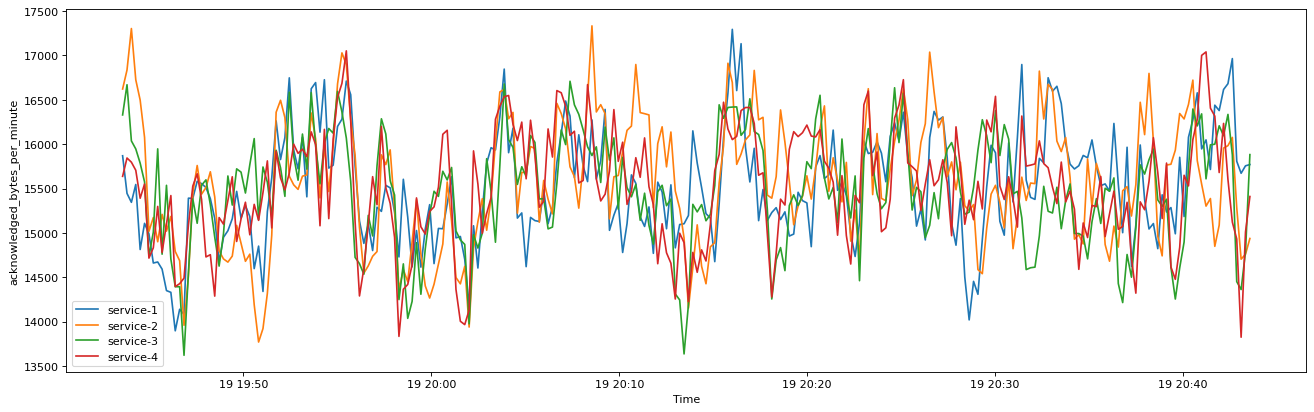

In [10]:
visualize('acknowledged_bytes_per_minute', 'rate(transmitted_bytes_sum[1m])')

                    serviceName      value
timestamp                                 
2022-02-19 19:43:35   service-1  62.833333
2022-02-19 19:43:49   service-1  64.416667
2022-02-19 19:44:03   service-1  63.966667
2022-02-19 19:44:17   service-1  63.400000
2022-02-19 19:44:31   service-1  62.016667


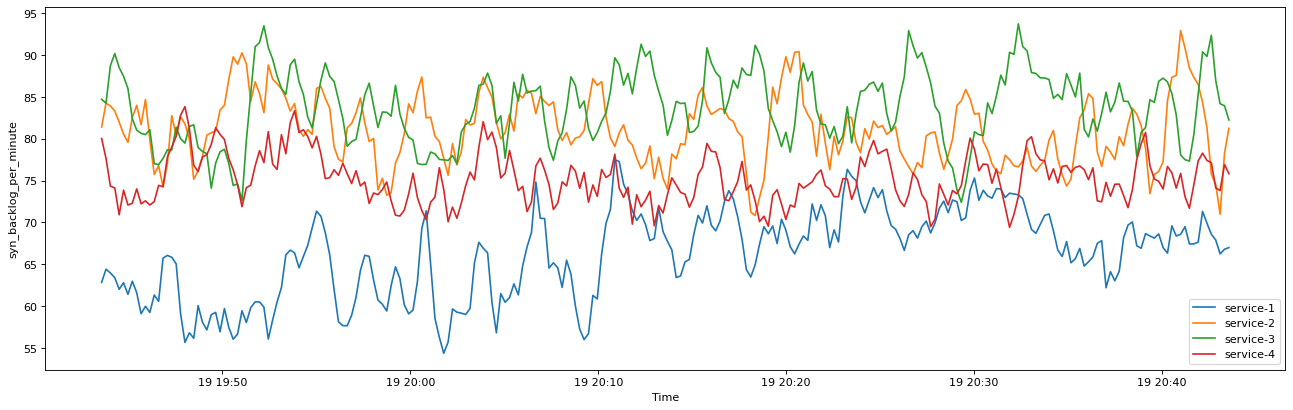

In [11]:
visualize('syn_backlog_per_minute', 'avg_over_time(backlog{level="1"}[1m])')

                    serviceName       value
timestamp                                  
2022-02-19 19:43:35   service-1  124.116667
2022-02-19 19:43:49   service-1  126.000000
2022-02-19 19:44:03   service-1  127.116667
2022-02-19 19:44:17   service-1  124.216667
2022-02-19 19:44:31   service-1  122.816667


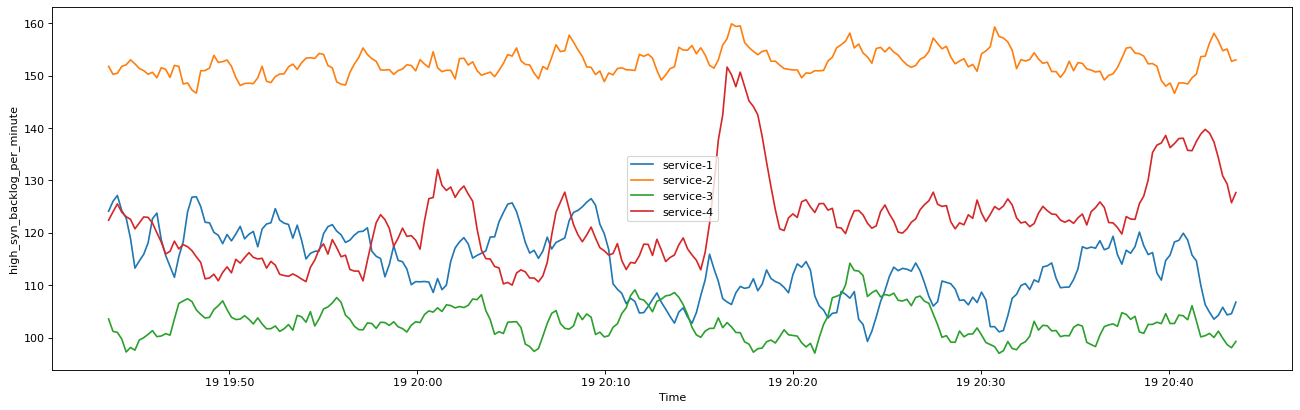

In [12]:
visualize('high_syn_backlog_per_minute', 'sum by (serviceName) (avg_over_time(backlog{level!="1"}[1m]))')